# IBM Supervised Learning: Regression peer- reviewed Project

*by Evangelos Tselentis - Straitouris*

## Introduction

Air pollution will endanger human health and life in big cities, especially to the elderly and children. This is not an individual  problem of one person but a global problem. Therefore, many countries  in the world made air pollution monitoring and control stations in many cities to observe air pollutants such as NO2, CO, SO2, PM2.5, and PM10 to alert the citizens about pollution index which exceeds the quality threshold. 

Particulate Matter PM 2.5 is a fine atmospheric pollutant that has a diameter of fewer than 2.5 micrometers. Particulate Matter PM10 is a coarse particulate that is 10  micrometers or less in diameter. Carbon Monoxide CO is a product of combustion of fuel such as coal, wood, or natural gas. Vehicular  emission contributes to the majority of carbon  monoxide  let into  our atmosphere. Nitrogen dioxide or nitrogen oxide expelled from high-temperature combustion: sulfur dioxide SO2 and Sulphur Oxides SO produced by volcanoes and in industrial processes. Petroleum and Coal often contain sulfur compounds, and their combustion generates sulfur dioxide. Air pollution is caused by the presence of poison gases and substances; therefore, it is impacted by the meteorological factors of a particular place, such as temperature, humidity, rain, and wind.

In this project, the regression analysis technique is used to  evaluate the relationship between these factors and **predict** nitrogen oxides NOx based on other parameters; **main objective of the analysis is to focus on prediction.**

## Dataset description

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.


Dataset attribute information:

- Date (DD/MM/YYYY)
- Time (HH.MM.SS)
- True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- True hourly averaged NOx concentration in ppb (reference analyzer)
- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
- PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- Temperature in Â°C
- Relative Humidity (%)
- AH Absolute Humidity


This dataset is from the UCI machine learning repository and contains hourly averaged responses from an air quality multi-sensor device that was located in a significantly polluted area at road level in an undisclosed Italian city. This data was collected over the course of approx one year (from March 2004 - February 2005)

*For reference*: https://archive.ics.uci.edu/ml/datasets/Air+Quality#

*Note*: Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. **Missing values are tagged with -200 value.**

In [1]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, pprint

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV 
from sklearn.pipeline import Pipeline

%matplotlib inline

print("All relevant modules were imported.")

All relevant modules were imported.


## Data cleaning and feature engineering.

In [2]:
airq = pd.read_csv('AirQualityUCI.csv', sep=',', delimiter=";",decimal=",")

In [3]:
airq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [4]:
airq.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [5]:
airq.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  Unnamed: 15  Unnamed: 16  
count  9357.000000  9357.000000  9357.000000          0.0          0.0  
mean      9.778305    39.485380    -6.837604          NaN          NaN  
std      43.203623    51.216145    38.976670          NaN          NaN  
min    -200.000000  -200.000000  -200.000000          NaN          NaN  
25%      10.900000    34.100000     0.692300          NaN          NaN  
50%      17.200000    48.600000     0.976800          NaN          NaN  
75%      24.100000    61.900000     1.296200          NaN          NaN  
max      44.600000    88.700000     2.231000          NaN          NaN

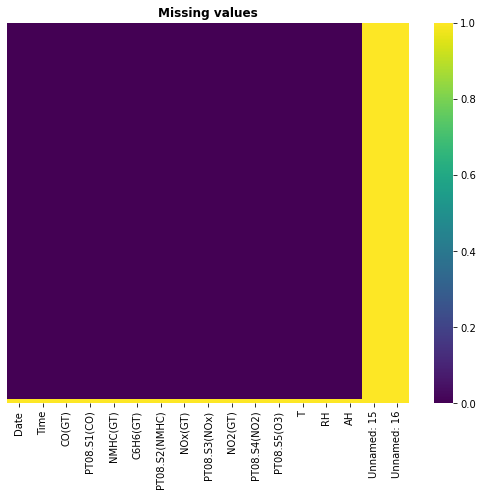

In [6]:
plt.figure(figsize=(9,7))
plt.title('Missing values', fontweight='bold')

ax = sns.heatmap(airq.isnull(),yticklabels=False,cbar='viridis',cmap='viridis')

plt.show()

In [7]:
airq.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [8]:
airq = airq.drop(["Unnamed: 15","Unnamed: 16"], axis=1)

In [9]:
airq.dropna(inplace=True)

In [10]:
airq.set_index("Date", inplace=True)

In [11]:
airq.index = pd.to_datetime(airq.index)

In [12]:
type(airq.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [13]:
airq['Time'] = pd.to_datetime(airq['Time'],format= '%H.%M.%S').dt.hour

In [14]:
airq.apply(lambda x : x == -200).sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

<AxesSubplot:ylabel='Date'>

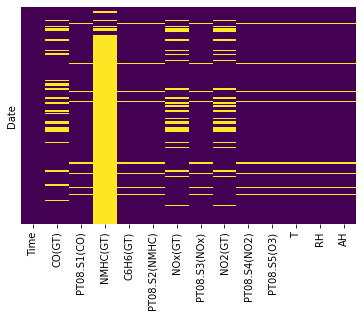

In [15]:
sns.heatmap(airq.isin([-200]),yticklabels=False,cbar=False,cmap='viridis')

The NHMC(GT) column is missing many values, more than 85% values are NaN; 8443 out of 9357. Thus this column can be removed from the dataset as these values are very less likely to be of any significant importance in this dataset.

In [16]:
airq.drop('NMHC(GT)', axis=1, inplace=True)

<AxesSubplot:ylabel='Date'>

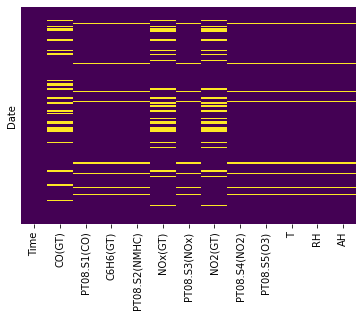

In [17]:
sns.heatmap(airq.isin([-200]),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
airq.isin([-200]).sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [19]:
airq.replace(to_replace= -200, value= np.NaN, inplace= True)

In [20]:
# Fill NaN values with average of particular date

def remove_outlier(col):
    airq[col] = airq.groupby('Date')[col].transform(lambda x: x.fillna(x.mean()))

In [21]:
col_list = airq.columns[1:]

for i in col_list:
    remove_outlier(i)

<AxesSubplot:ylabel='Date'>

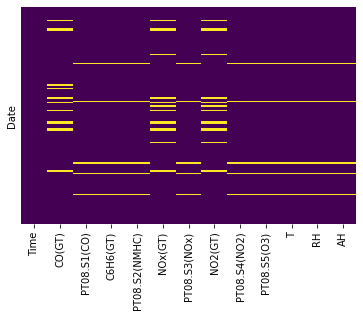

In [22]:
sns.heatmap(airq.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
# forward fill method for removing the leftover nan values

airq.fillna(method='ffill', inplace= True)

<AxesSubplot:ylabel='Date'>

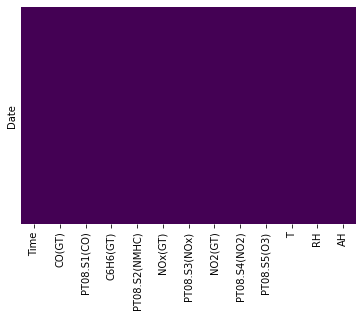

In [24]:
sns.heatmap(airq.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
airq.isnull().any()

Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

## EXPLORATORY DATA ANALYSIS

In [26]:
airq.dtypes.value_counts()

float64    12
int64       1
dtype: int64

In [27]:
columns = list(airq.columns)

columns[1:]

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

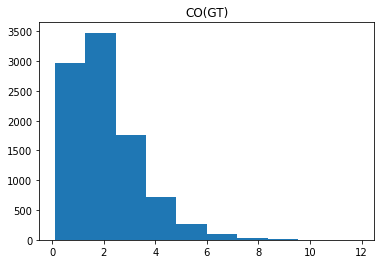

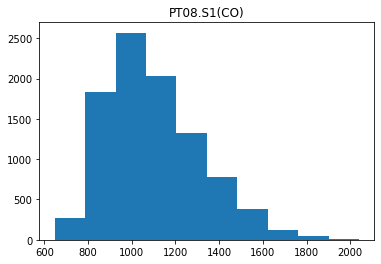

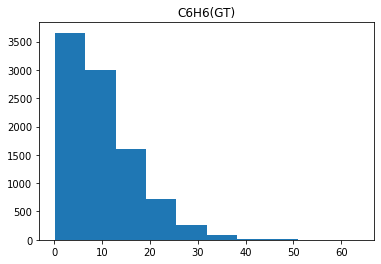

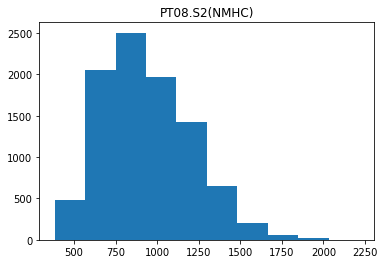

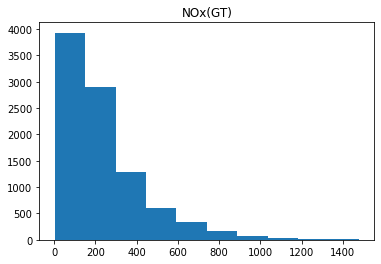

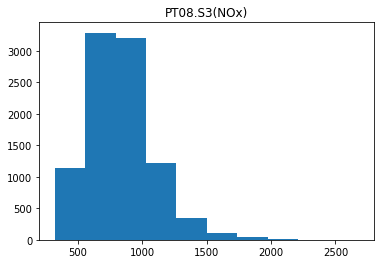

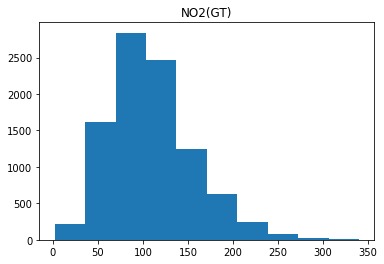

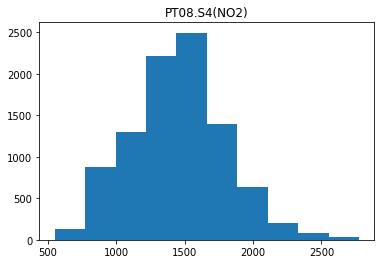

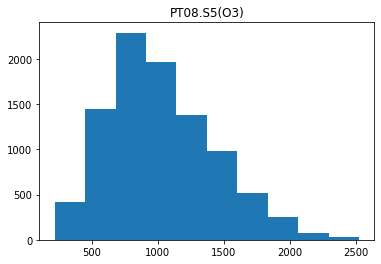

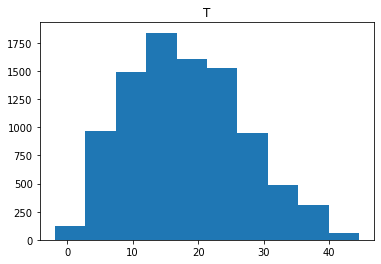

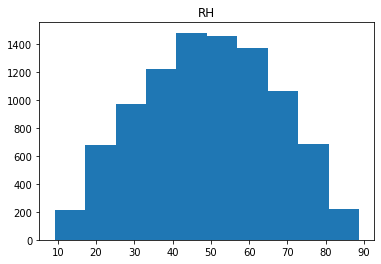

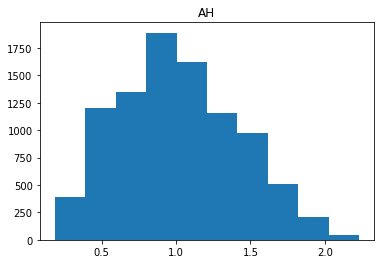

In [28]:
for col in columns[1:]:
    plt.hist(airq[col])
    plt.title(col)
    plt.show()

(array([1.000e+00, 3.000e+00, 2.300e+01, 1.850e+02, 6.860e+02, 1.556e+03,
        2.882e+03, 2.504e+03, 1.255e+03, 2.620e+02]),
 array([0.69314718, 1.35374461, 2.01434204, 2.67493947, 3.33553689,
        3.99613432, 4.65673175, 5.31732918, 5.97792661, 6.63852403,
        7.29912146]),
 <BarContainer object of 10 artists>)

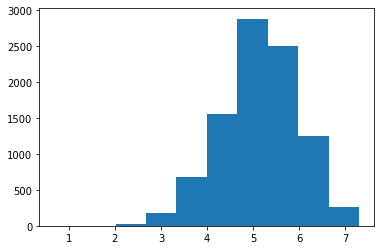

In [29]:
# Log-transform the skewed features

plt.hist(airq['NOx(GT)'].apply(lambda x: np.log(x)))


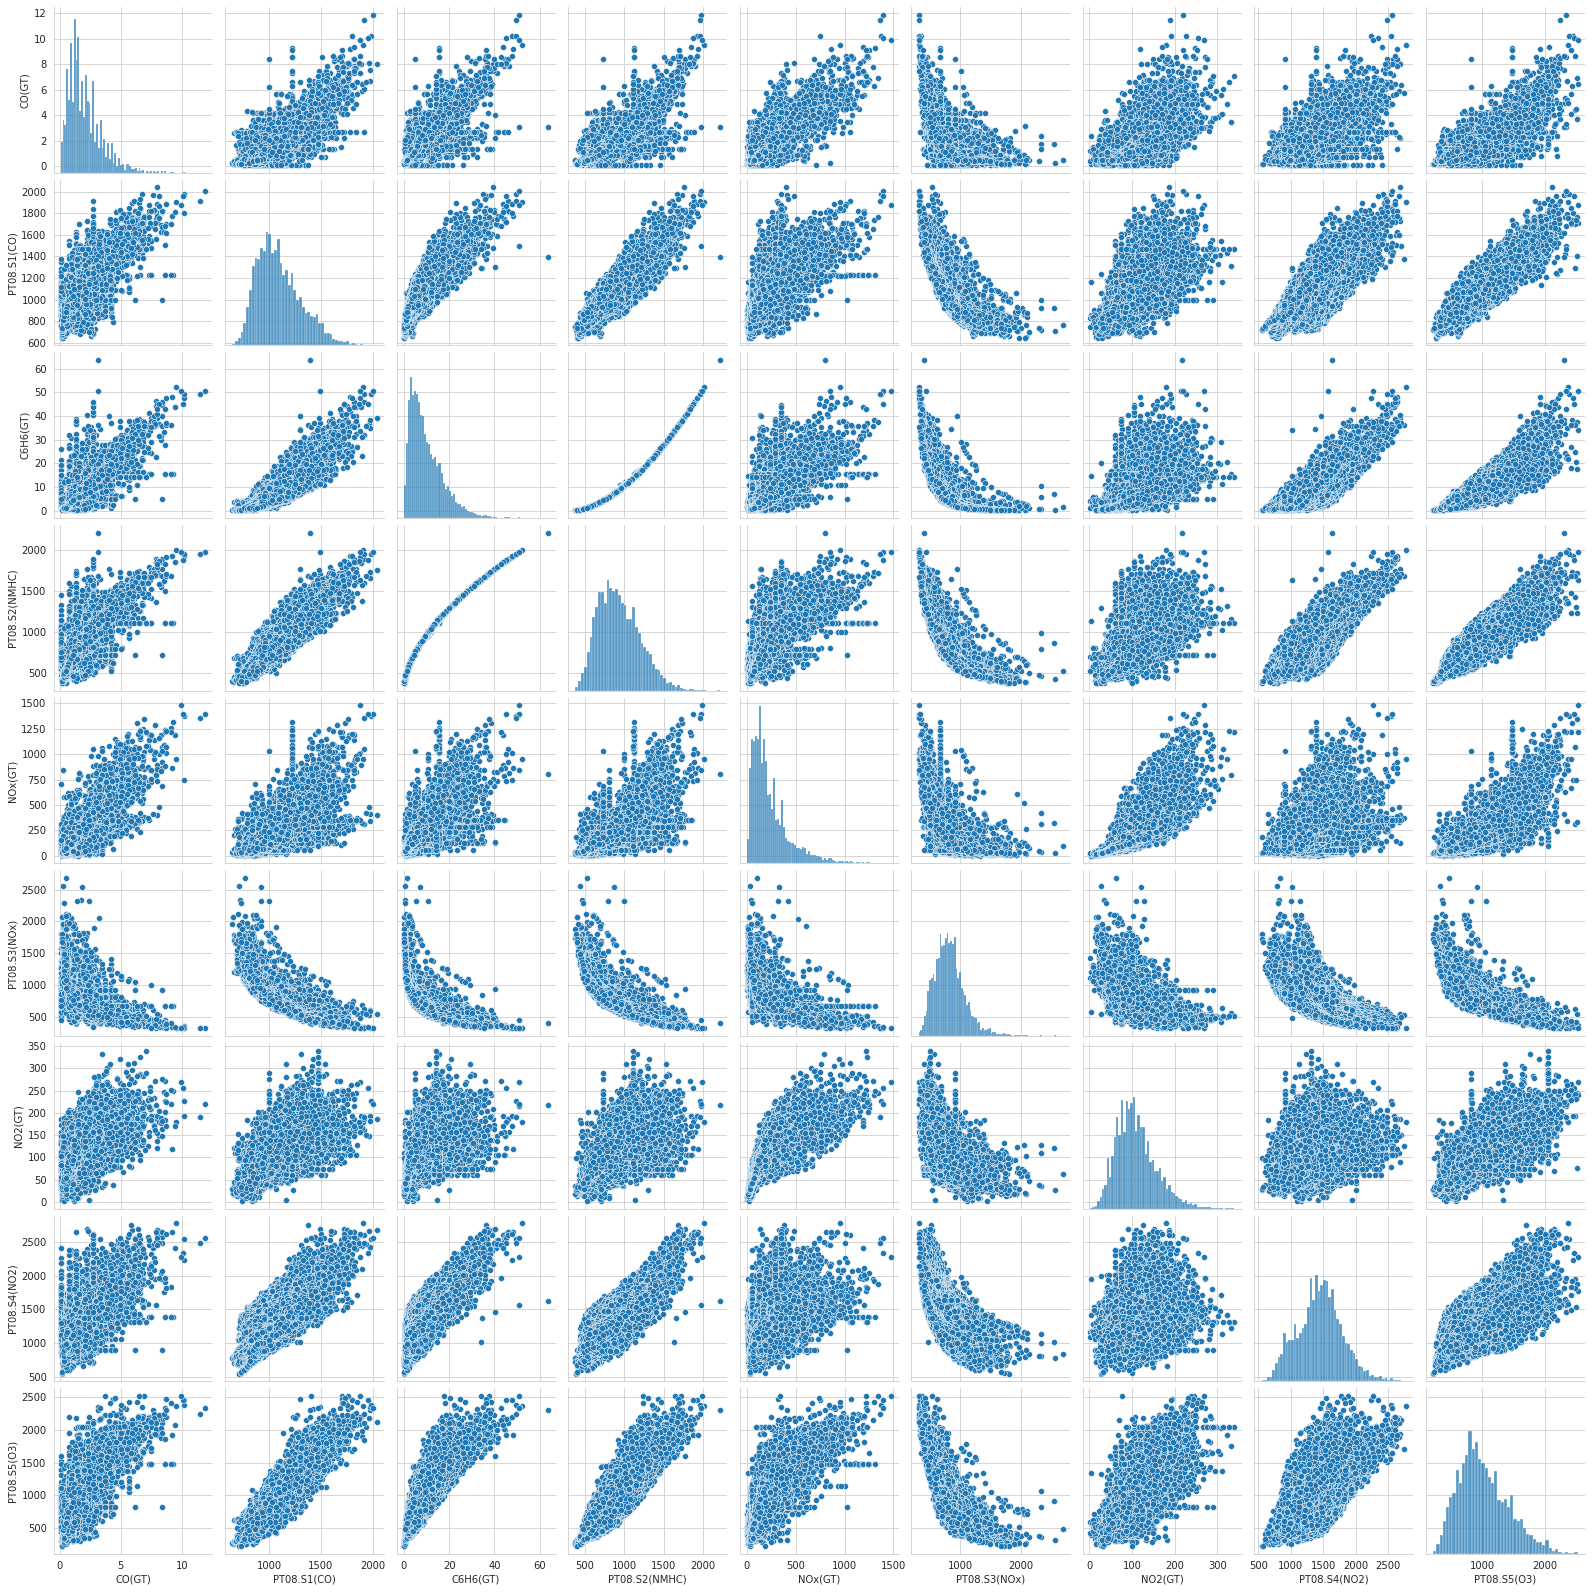

In [30]:
sns.set_style('whitegrid')
eda_air = airq.drop(['Time','RH','AH','T'], axis=1)
sns.pairplot(eda_air)

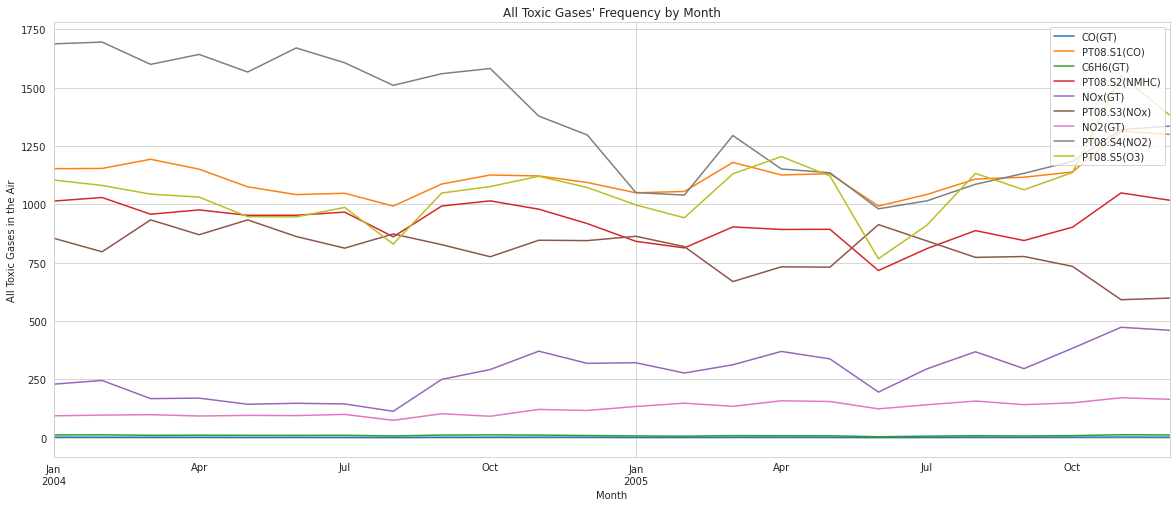

In [31]:
airq.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("All Toxic Gases' Frequency by Month");

Text(0.5, 1.0, 'Mean Total Carbon Monoxides (CO) Level by Month')

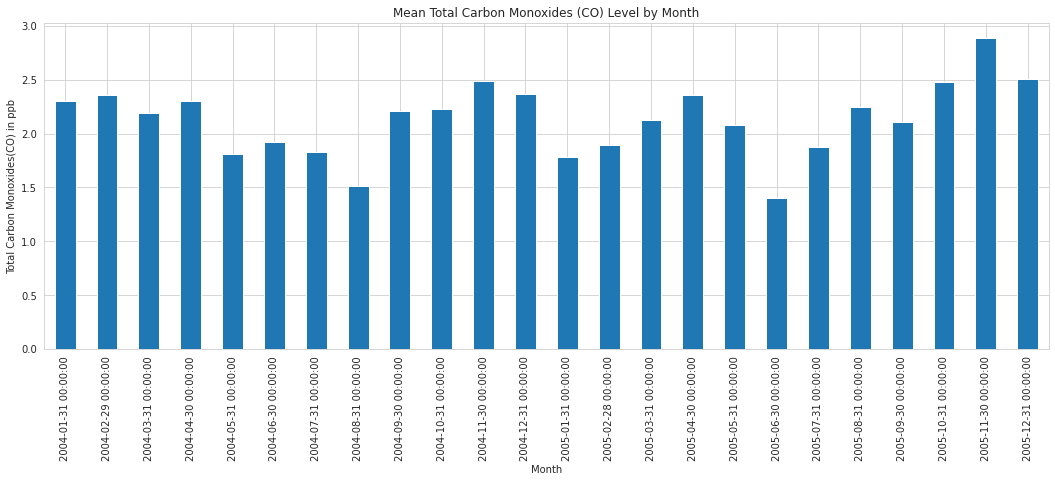

In [32]:
airq['CO(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Carbon Monoxides(CO) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Carbon Monoxides (CO) Level by Month")

Text(0.5, 1.0, 'Mean Total Benzene(C6H6) Level by Month')

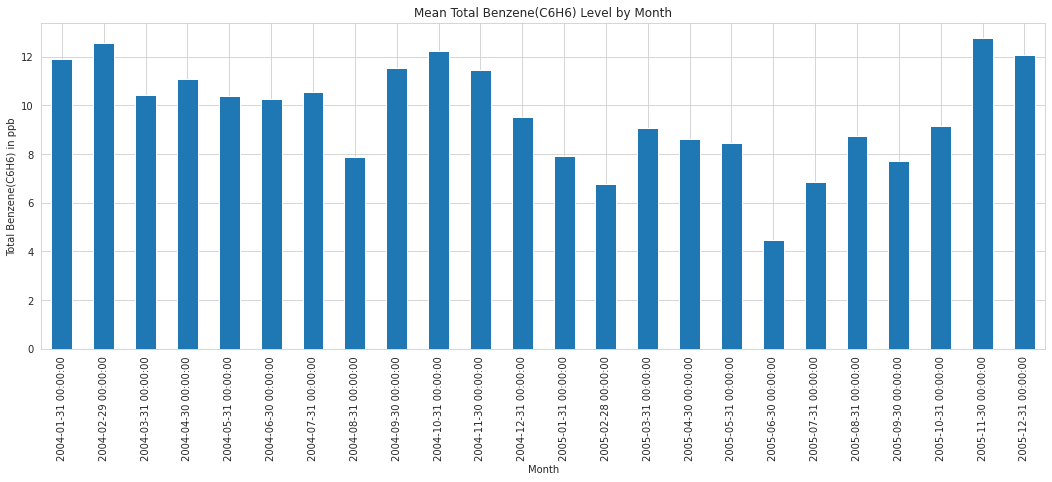

In [33]:
airq['C6H6(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Benzene(C6H6) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Benzene(C6H6) Level by Month")


Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NOx) Level by Month')

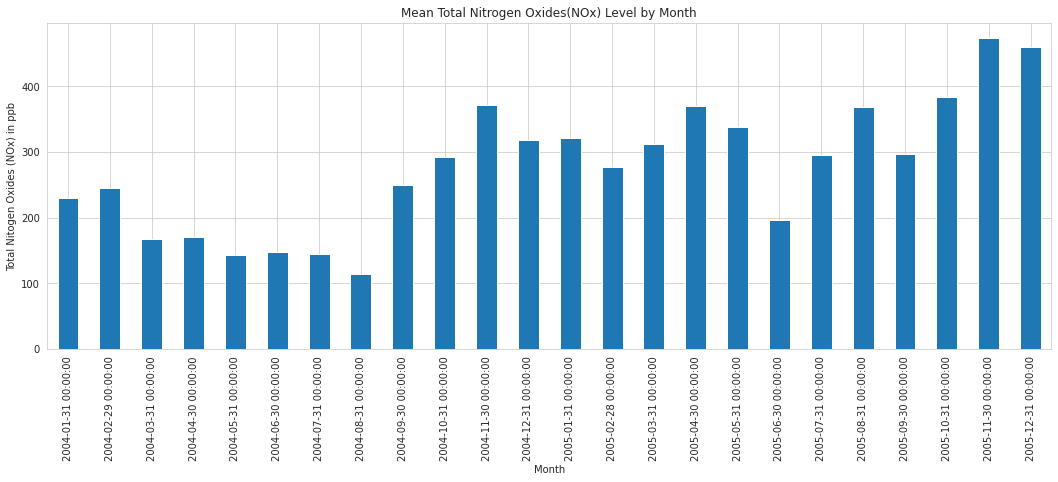

In [34]:
airq['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NOx) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NO2) Level by Month')

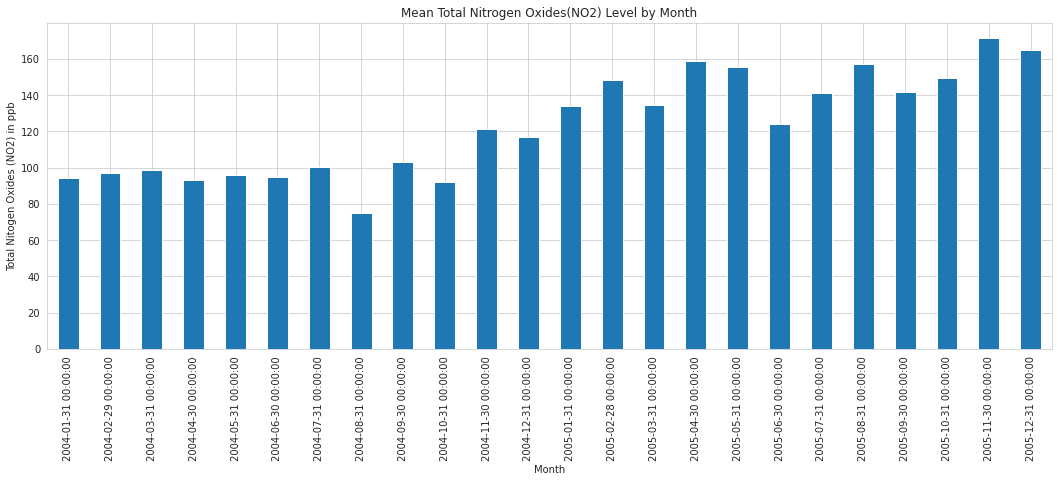

In [35]:
airq['NO2(GT)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Nitogen Oxides (NO2) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NO2) Level by Month")

Text(0.5, 1.0, 'Mean Total Ozone(O3) Level by Month')

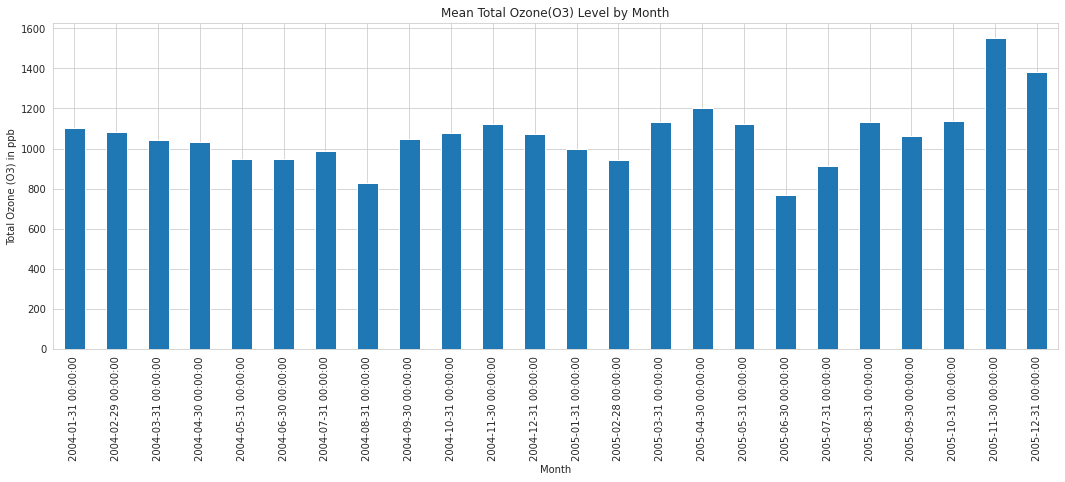

In [36]:
airq['PT08.S5(O3)'].resample('M').mean().plot(kind='bar', figsize=(18,6))
plt.xlabel('Month')
plt.ylabel('Total Ozone (O3) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Ozone(O3) Level by Month")


Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During Days')

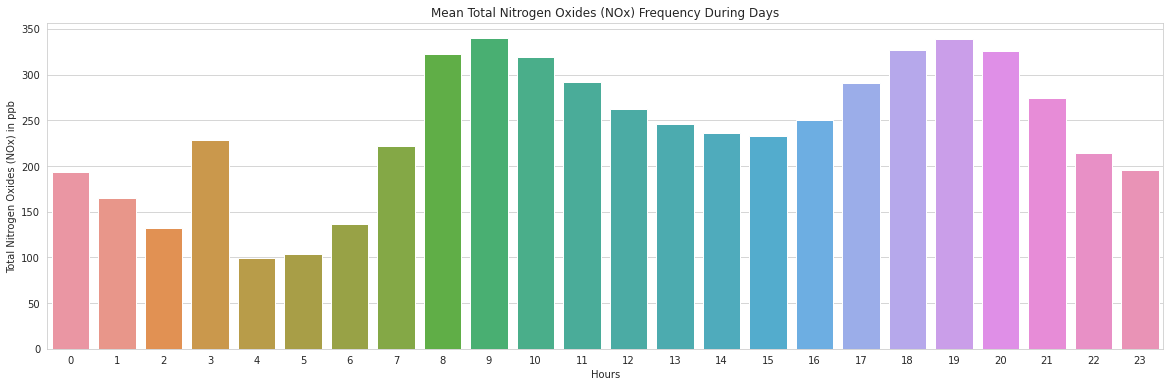

In [37]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=airq, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Benzene (C6H6) Frequency During Days')

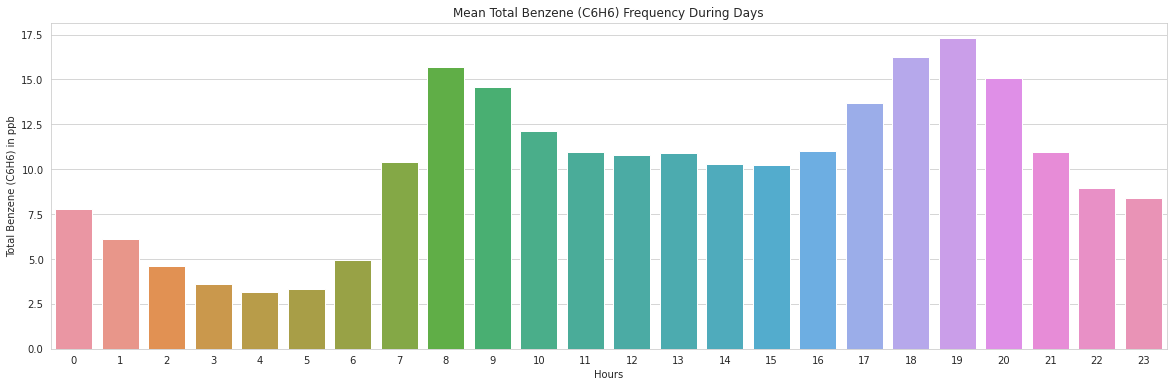

In [38]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='C6H6(GT)',data=airq, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Benzene (C6H6) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Benzene (C6H6) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NO2) Frequency During Days')

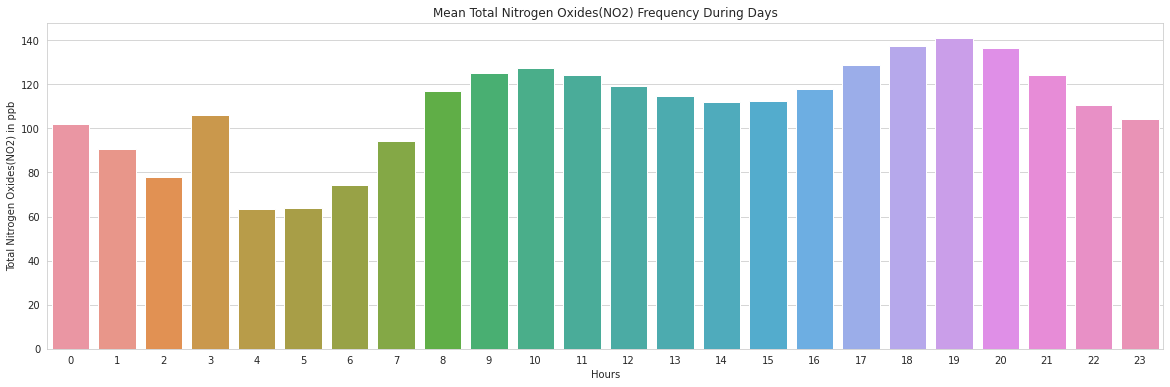

In [39]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NO2(GT)',data=airq, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides(NO2) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NO2) Frequency During Days")

Text(0.5, 1.0, 'Mean Total Ozone(O3) Frequency During Days')

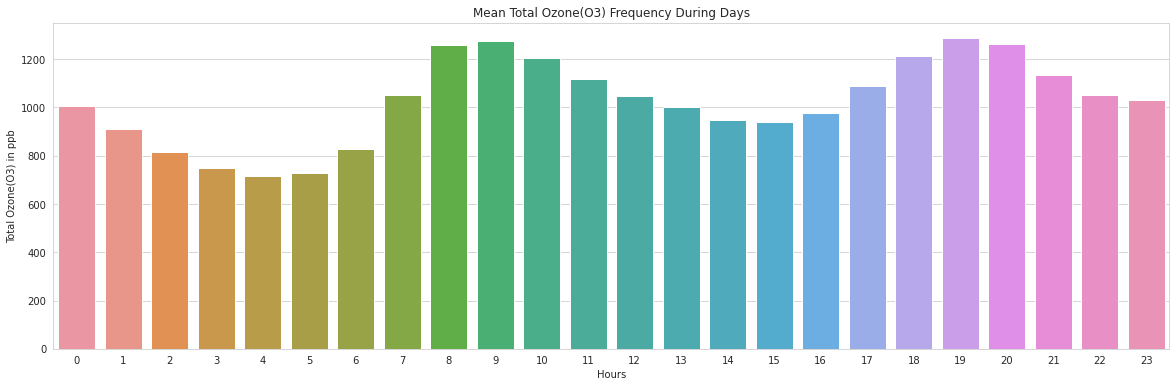

In [40]:
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='PT08.S5(O3)',data=airq, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Ozone(O3) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Ozone(O3) Frequency During Days")

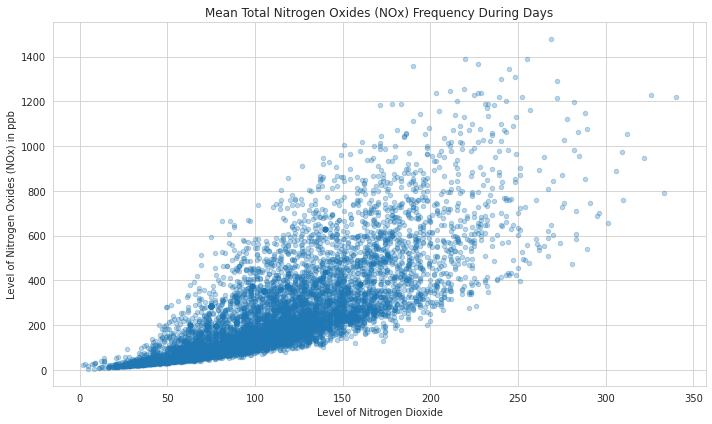

In [41]:
airq.plot(x='NO2(GT)',y='NOx(GT)', kind='scatter', figsize = (10,6), alpha=0.3)
plt.xlabel('Level of Nitrogen Dioxide')
plt.ylabel('Level of Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")
plt.tight_layout();

<AxesSubplot:>

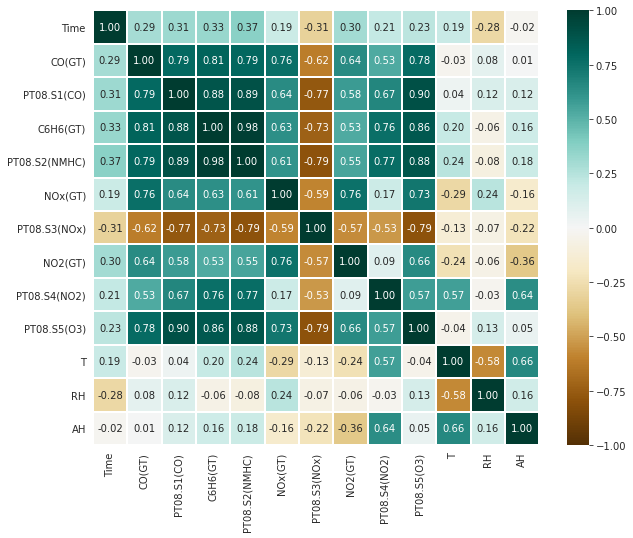

In [42]:
corrPearson = airq.corr(method="pearson")


plt.figure(figsize=(10,8))
sns.heatmap(corrPearson, 
            annot=True,
            fmt=".2f",
            linewidth=.20,
            cmap='BrBG',
            vmin=-1, 
            vmax=+1
           )

<ipython-input-43-b13df2c2b04c>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrPearson, dtype=np.bool))


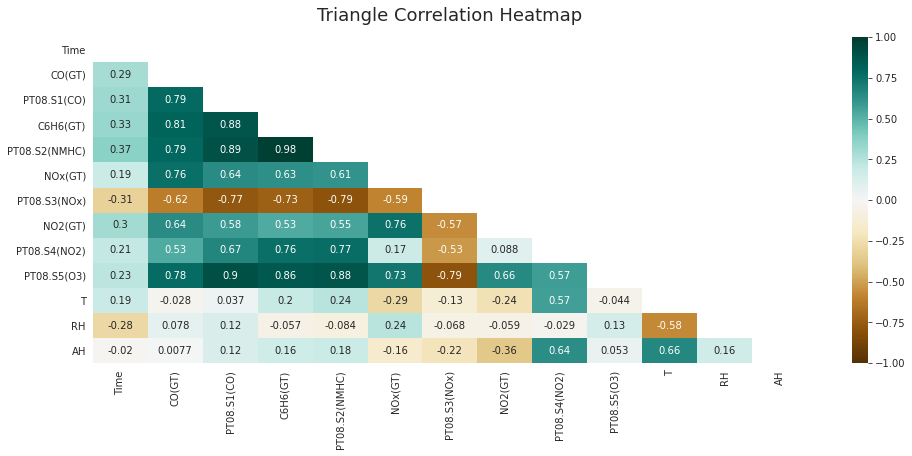

In [43]:
plt.figure(figsize=(16,6))

mask = np.triu(np.ones_like(corrPearson, dtype=np.bool))

heatmap = sns.heatmap(corrPearson, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


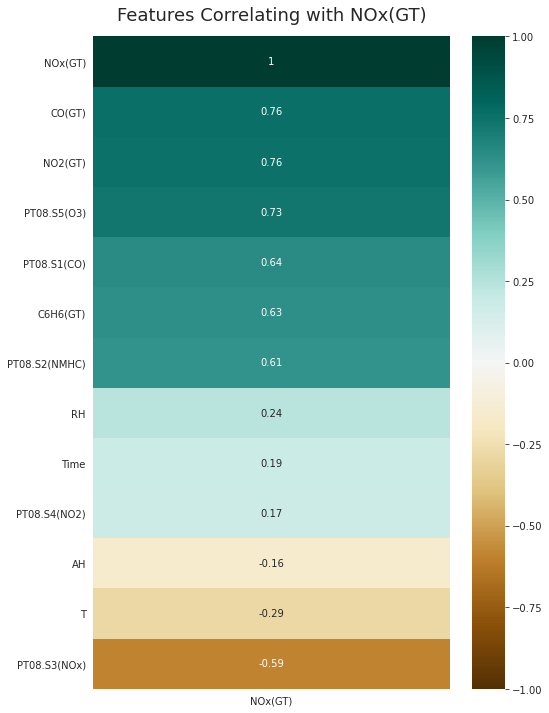

In [44]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrPearson[['NOx(GT)']].sort_values(by='NOx(GT)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with NOx(GT)', fontdict={'fontsize':18}, pad=16);

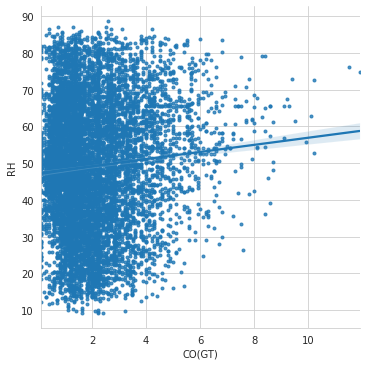

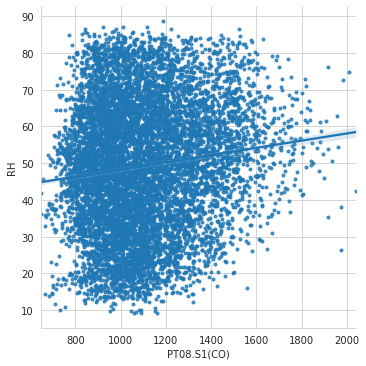

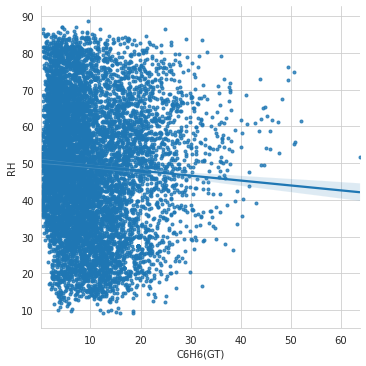

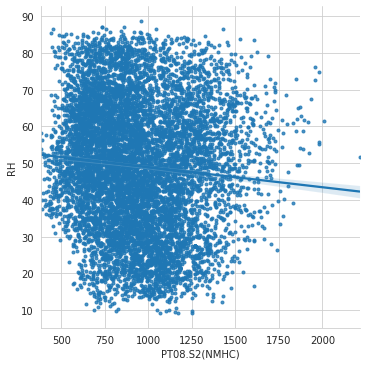

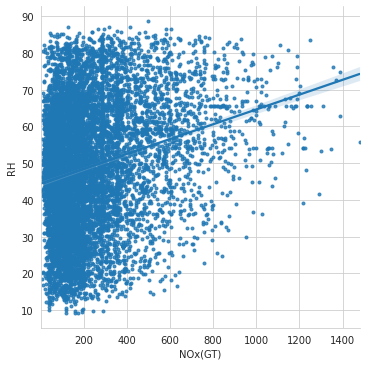

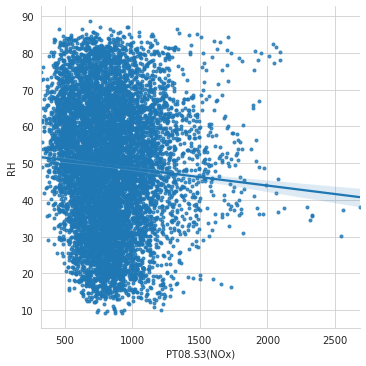

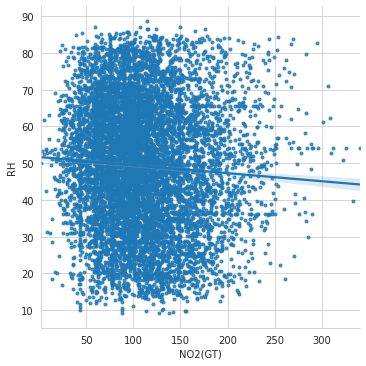

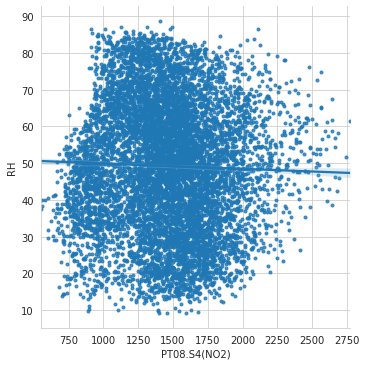

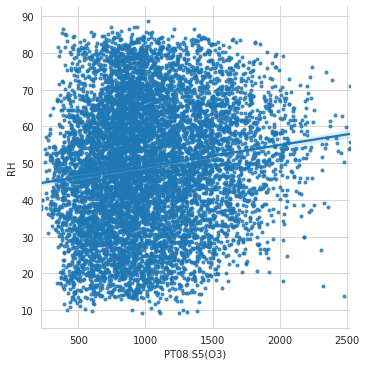

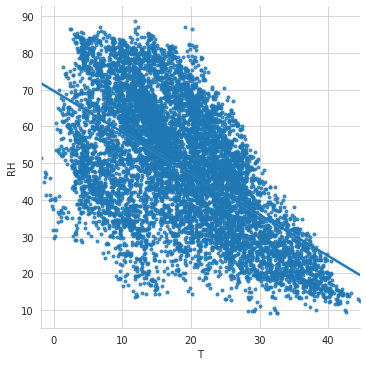

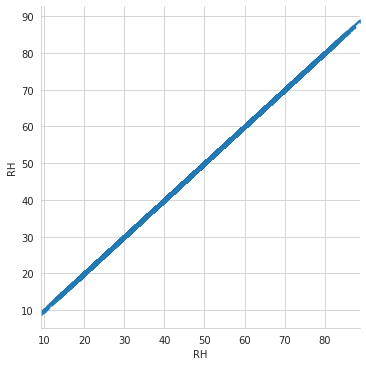

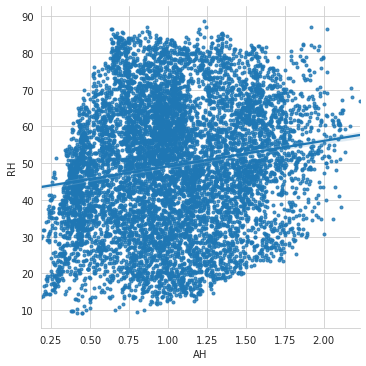

In [45]:
column_=airq.columns.tolist()[1:]
for i in airq.columns.tolist()[1:]:
    sns.lmplot(x=i,y='RH',data=airq,markers='.')

## ML Linear, Lasso, Ridge, Elastic Net models

In [46]:
X = airq.drop(['NOx(GT)','T','Time'], axis=1)

y= airq['NOx(GT)']

In [47]:
X = np.log(X)
y = np.log(y)

/home/tselest/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOx(GT)', ylabel='Density'>

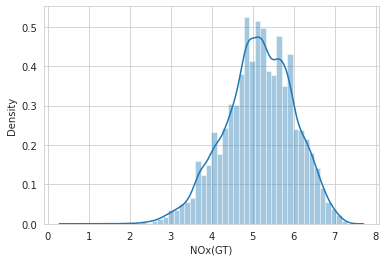

In [48]:
sns.distplot(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=101)

In [50]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 6549 samples.
Testing set has 2808 samples.


In [62]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

s = StandardScaler()
lr = LinearRegression()

X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)  
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)

# with pipeline
estimator = Pipeline([("scaler", s),("regression", lr)])
predictions_lr = cross_val_predict(estimator, X_train, y_train, cv=kf)
linear_score = r2_score(y_train, predictions_lr)

linear_score, score #almost identical

(0.8773345173587086, 0.8765640967999826)

/home/tselest/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions')

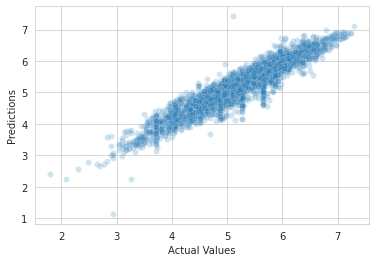

In [63]:
sns.scatterplot(y_test, y_pred, alpha = 0.2)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

/home/tselest/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOx(GT)', ylabel='Density'>

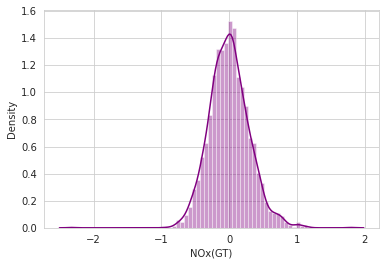

In [72]:
sns.distplot((y_test-y_pred), bins=70, color="purple")

In [64]:
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2290190551198133
MSE: 0.08797015944419892
RMSE: 0.2965976389727317


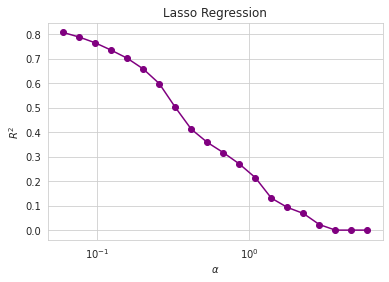

In [65]:
# lasso regression and K-fold cross validation
pf = PolynomialFeatures(degree=3)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
scores = []
alphas = np.geomspace(0.06, 6.0, 20)
predictions_lsr = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions_lsr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions_lsr)
    
    scores.append(score)
plt.semilogx(alphas, scores, '-o', color='purple')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [66]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X_train, y_train)
lasso_score = best_estimator.score(X_train, y_train)

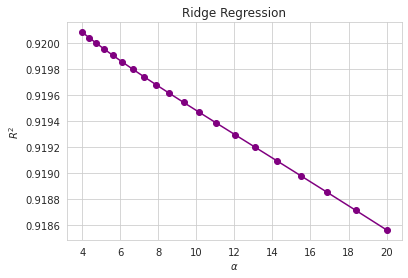

In [67]:
# ridge regression and K-fold cross validation
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
predictions_rr = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions_rr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions_rr)
    scores.append(score)

plt.plot(alphas, scores, '-o', color='purple')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [68]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=0.03))])

best_estimator.fit(X_train, y_train)
ridge_score = best_estimator.score(X_train, y_train)

In [69]:
# comparing accuracy scores
pd.DataFrame([[linear_score, lasso_score, ridge_score]],columns=['linear', 'lasso', 'ridge'], index=['score'])

linear     lasso     ridge
score  0.877335  0.847026  0.924211

In [70]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

# Fit a basic linear regression model
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

# Fit a regular (non-cross validated) Ridge model
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

# Fit a Lasso model using cross validation and determine the optimum value for 𝛼
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])
lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

# Fit elastic net with the same set of alphas as lasso
l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))


rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Lasso', 'Ridge' 'ElasticNet']

# creating a pandas dataframe for comparing root-mean square errors
rmse_df = pd.DataFrame([[linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]],columns=['Linear', 'Lasso', 'Ridge', 'ElasticNet'], index=['rmse'])
rmse_df

Linear     Lasso     Ridge  ElasticNet
rmse  0.296598  0.296621  0.296621     0.29665

[Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted'),
 Text(0.5, 1.0, 'Linear Regression Results')]

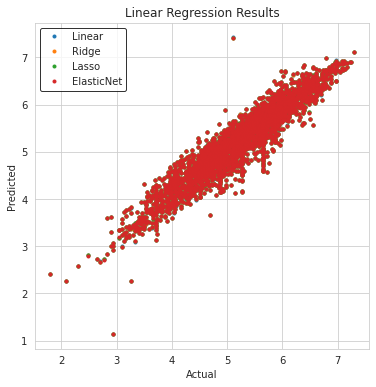

In [71]:
# plotting the results: prediction vs actual values

f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels, models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet'], [linearRegression, ridgeCV, lassoCV, elasticNetCV]

for mod, label in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), marker='o', ls='', ms=3.0, label=label, alpha=1)
    
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual', ylabel='Predicted', title='Linear Regression Results')

## Conclusion

Two of the most toxicologically significant compounds are nitric oxide (NO) and nitrogen dioxide (NO2). Nitrogen Oxides (NOx) are among the most dangerous forms of air pollution. They are produced from the reaction of nitrogen and oxygen gases in the air during combustion, especially at high temperatures. In areas of high motor vehicle traffic, such as in large cities, the amount of nitrogen oxides emitted into the atmosphere as air pollution can be significant. It is mainly due to fossil fuel combustion from both stationary sources, i.e. power generation (21%), and mobile sources, i.e. transport (44%). Other atmospheric contributions come from non-combustion processes, for example nitric acid manufacture, welding processes and the use of explosives.

In addition, these create serious health issues. These mainly impact on respiratory conditions causing inflammation of the airways at high levels. Long term exposure can decrease lung function, increase the risk of respiratory conditions and increases the response to allergens. NOx also contributes to the formation of fine particles (PM) and ground level ozone, both of which are associated with adverse health effects.

In this project, the AirQuality dataset from UCI was used, for exploratory data analysis and the prediction of NOx. linear regression models (Linear baseline, ridge, lasso and elasticnet) were created and trained, using the same training and test splits, and then compared to find the best model among them.

Based on the models findings, the simple linear model gives the smallest Root-mean-square error. However, the difference in scores and errors are not significant and almost identical. Therefore it is recommended as a final model as it best fits the data in terms of accuracy.

The above models could give even better results if we used GridSearchCV or RandomizedSearchCV to optimize the models' hyperparameters. Alternatively, different techniques like Random Forest Regression or SUpport Vector Machine could be used. 

Here, NOx levels were predicted, using the Air Quality dataset. However, there are many others ways to measure air pollution, including PM10 (particulate matter around between 2.5 and 10 microns in diameter), carbon monoxide, sulfur dioxide, nitrogen dioxide, ozone (O3), etc.
